# Iris Flower Classification

### Goal:

Build a model that classifies an Iris flower as Setosa, Virginica, or Versicolor.

### Steps:

1. Prepare the data.
2. Build the model.
3. Train the model.
4. Make predictions.
5. Evaluate the classification performance of the model.

# Import Important Modules

In [2]:
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.datasets import load_iris
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import datasets

# Load Toy Dataset

In [39]:
from sklearn.datasets import make_blobs

# Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5, random_state=42)

# Convert to DataFrame for visualization
df_blobs = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df_blobs['Target'] = y

# Display the first few rows of the DataFrame
df_blobs.head()

,Feature 1,Feature 2,Target
0,0.653810,0.474732,1
1,5.446675,-0.094908,1
2,4.701154,3.218165,1
3,-5.164957,10.198267,0
4,5.342359,0.416421,1


## Visualize dataset

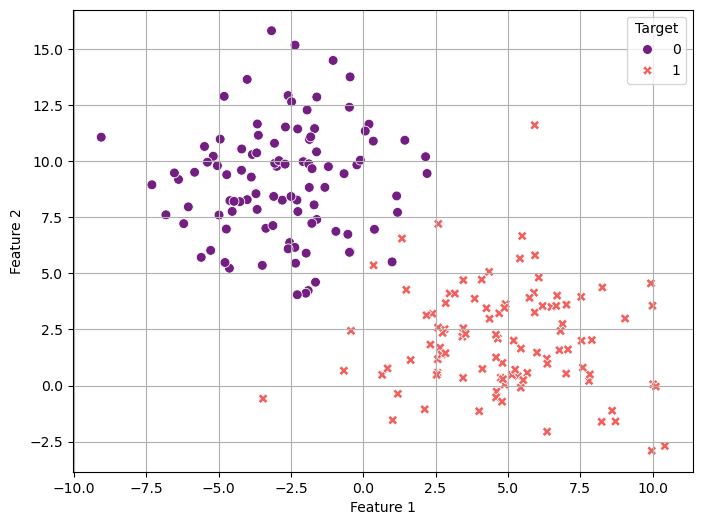

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Feature 1', 
    y='Feature 2', 
    hue='Target', 
    data=df_blobs, 
    palette='magma', 
    style='Target', 
    s=50
)
# plt.title('Scatter Plot of Synthetic Data Generated by make_blobs')
plt.grid(True)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Target')
plt.savefig('blobs_dataset.png', dpi=300, bbox_inches='tight')
plt.show()

## Split the Data

In [42]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [29]:
X_train.shape

(140, 2)

## Classification Algorithms

In [61]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Support Vector Classifier

#### Linear Kernel

In [44]:
model_svm_linear = SVC(kernel='linear', C=10, random_state=42)
model_svm_linear.fit(X_train,y_train)
# Test the model
predictions = model_svm_linear.predict(X_test)
print(model_svm_linear.score(X_test, y_test))

0.9833333333333333


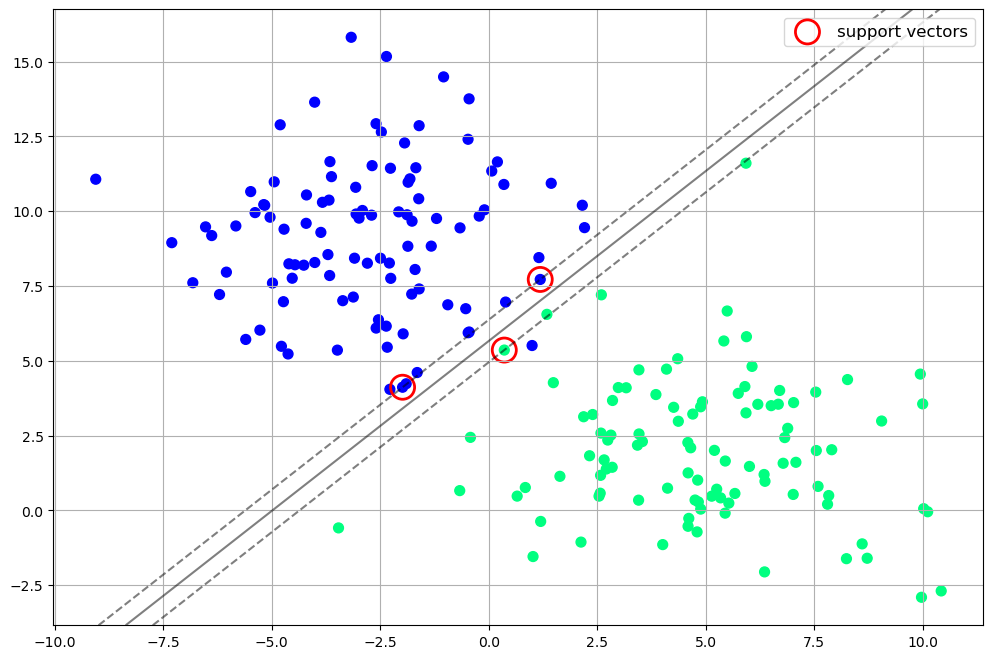

In [46]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model_svm_linear);
plt.legend(loc="upper right", fontsize=12)
plt.grid(True)
plt.savefig('linear_svm.png', dpi=300, bbox_inches='tight')
plt.show()

#### RBF Kernel

In [60]:
model_svm_rbf = SVC(kernel='rbf', gamma='scale')
model_svm_rbf.fit(X_train,y_train)
# Test the model
predictions = model_svm_rbf.predict(X_test)
print(model_svm_rbf.score(X_test, y_test))

0.95


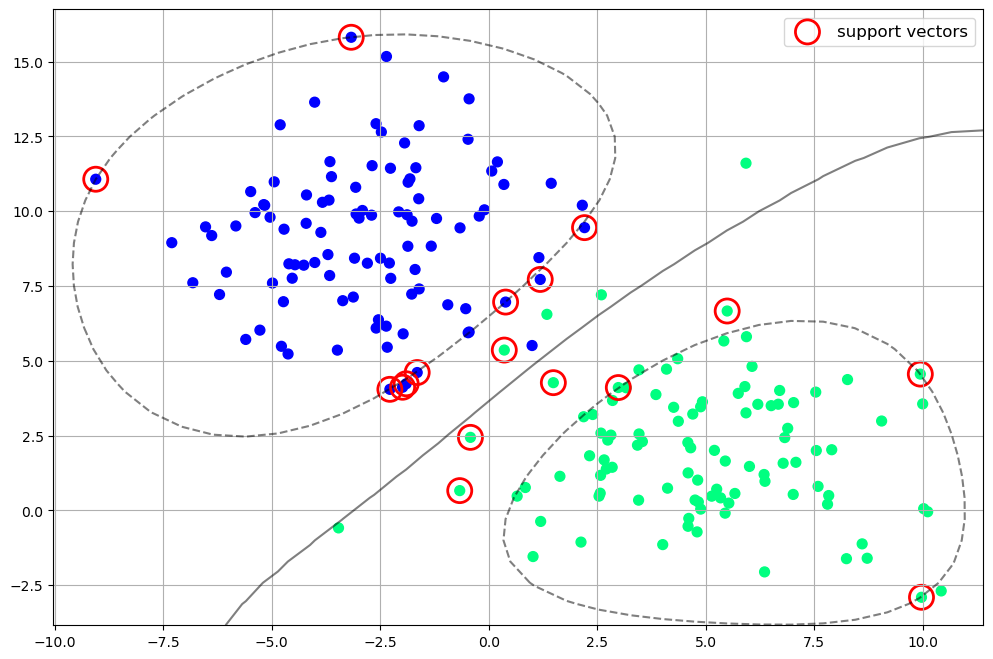

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model_svm_rbf);
plt.legend(loc="upper right", fontsize=12)
plt.grid(True)
plt.savefig('rbf_svm.png', dpi=300, bbox_inches='tight')
plt.show()

#### Polynomial Kernel

In [50]:
model = SVC(kernel='poly', gamma='scale')
model.fit(X_train,y_train)
# Test the model
predictions = model.predict(X_test)
print(model.score(X_test, y_test))

0.9333333333333333


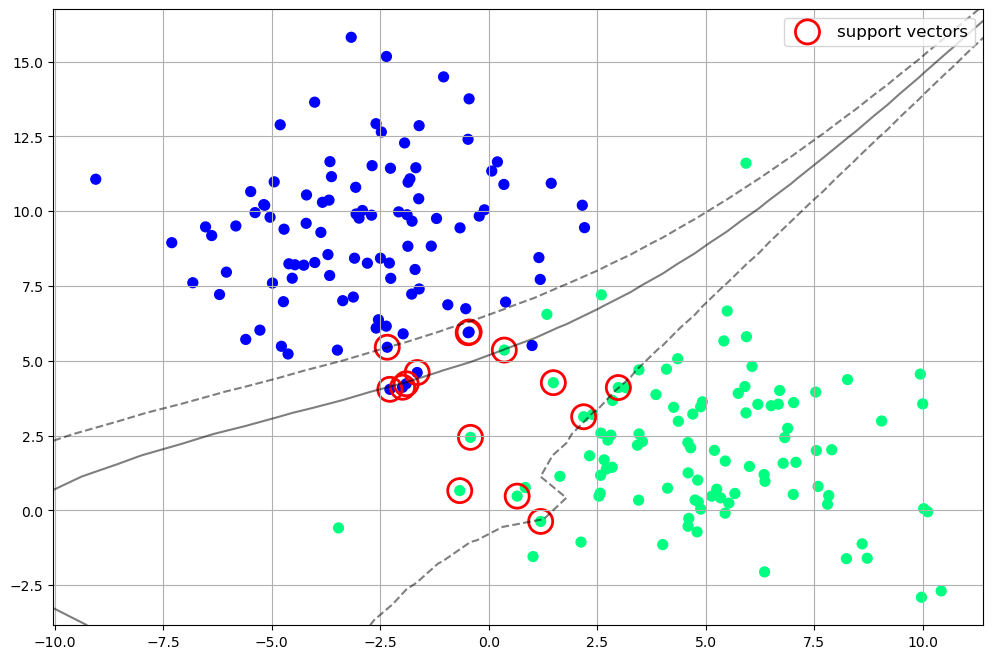

In [52]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);
plt.legend(loc="upper right", fontsize=12)
plt.grid(True)
plt.savefig('poly_svm.png', dpi=300, bbox_inches='tight')
plt.show()

Sources: https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/